# Investigating the Prime Number Theorem

In number theory, the prime number theorem gives an approximation of the number of primes up to a given integer. Let $n$ be a natural number and define $\Pi: \mathbb{N}\to\mathbb{N}$ so $\Pi(n)$ is the number of positive prime numbers which are less than or equal to $n$. Thus $\Pi(2)=1$, $\Pi(7)=4$ etc.

The prime number theorem states that for large enough $n$, $\Pi(n)$ is well-approximated by the following two functions:
$$f(n) = \frac{n}{\log n} \text{ and } Li(n) = \int_2^n{\frac{1}{\log t} \,dt}.$$

Formally, the prime number theorem states that $$\lim_{n\to\infty}\frac{\Pi(n)}{f(n)}=1$$
and $$\lim_{n\to\infty}\frac{\Pi(n)}{Li(n)}=1.$$

We will graph these functions in the range where $n<3,000$ to numerically check the prime number theorem and compare the two approximations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def convert_to_text(number): 
    """ 
    Returns a string that is the decoding of the input integer number.
    This is done by converting number to a binary string, removing the 
    leading character '1', slicing out each 8 bit substring consecutively,
    converting each such string to the character it encodes and concatenating
    these characters to obtain the decoded string.    
    """
    # Remove '0b1' from the string
    bin_string = bin(number)[3:]    
    text = ''                           
    length = len(bin_string)
    for i in range(0,length,8):  
        # Pick out binary strings, 8 bits at a time
        byte_string = bin_string[i:i+8]   
        # Convert byte_string to a character before 
        # appending it to text 
        text = text + chr(int(byte_string,2))  
    return text

In [4]:
def modular_inverse(a,b): 
    '''
    Given input (a,b) with a and b integers returns 
    the multiplicative inverse of a modulo b provided 
    gcd(a,b) = 1. Otherwise returns an error message.
    '''
    ic_message = 'The numbers are not comprime'
    (g,x,y) = gcd_ext(a,b)
    if not g == 1: 
        print(ic_message)
        return None
    x = x % b 
    return x 



In [7]:
def is_prime(n,verbose=False): 
    '''
    Checks whether the argument n is a prime number using a brute force 
    search for factors between 1 and n. We made it verbose here for 
    illustration. (I.e. it prints out its results.)
    '''
    # First, 1 is not prime.
    if n == 1:
        return False
    # If n is even then it is only prime if it is 2
    if n % 2 == 0: 
        if n == 2: 
            return True
        else:
            if verbose:
                print("{} is not prime: {} is a factor. ".format(n,2))
            return False
    # So now we can consider odd numbers only. 
    j = 3
    rootN = n**0.5
    # Now check all numbers 3,5,... up to sqrt(n)
    while j <= rootN: 
        if n % j == 0:
            if verbose:
                print("{} is not prime: {} is a factor.".format(n,j))
            return False
        j = j + 2
    if verbose:
        print("{} is prime.".format(n))
    return True 


In [8]:
print([p for p in range(100) if is_prime(p)])

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


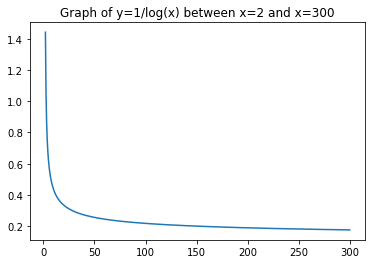

In [9]:
##Here is a graph of 1/log t.
x=np.linspace(2,300,1000)
y=1/np.log(x)
plt.plot(x,y)
plt.title('Graph of y=1/log(x) between x=2 and x=300')
plt.show()

The function $Li$ above is called the logarithmic integral. The integrand $\frac{1}{\log t}$ does not have an elementary anti-derivative but can be integrated numerically.

We will decide on a reasonable scheme to numerically integrate to calculate $Li$ and define a function `Li(n)` which  approximates the logarithmic integral. In choosing this method we will consider the following factors:
- The function has to be a "close enough" approximation to allow you to compare $Li(n)$ to $\Pi(n)$.
- The function should not take too long to calculate. We will need to evaluate $Li(n)$ many times to draw a graph.
- It may be useful to know whether our estimate is either an overestimate or an underestimate of the true value.

We will use trapezoidal rule to calculate the integral analytically. We will programme it using $2$ as a lower bound and $n$ as the variable upper bound. Then inserting $\frac{1}{\log t}$  into this and taking $n$ as the sole input into the overall function will yield the result required. $x$ denotes the number of steps taken for the calculation. $1000$ steps provides a high degree of accuracy with a reasonably fast execution time.

In [20]:
def Li(n):
    # Using trapezoidal rule to calculate integral analyltically
    def trapezium(f,n,x):
    # x is number of steps
    # f is the function we want to integrate
    # we will start from 2 and integrate to n
        h = (n-2)/x
        s= 0.0
        s += f(2)/2
        for i in range(1,x):
            s+= f(2 +i*h)
        s += f(n)/2
        return s * h
    # Now we can insert target function to integrate with desired accuracy
    return trapezium(lambda x:1/np.log(x),n,1000)

In [21]:
assert Li(3000) > 441 and Li(3000) < 443

In [22]:
# speed test
def test_Li():
    for i in range(2,3000):
        Li(i)
        
%timeit test_Li()

3.14 s ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Next we will need a way to find $\Pi(n)$. We will create a list (or a numpy array) called `primes` which contains all primes between $1$ and $3000$ in numerical order. (Using the `is_prime` function above)

In [23]:
primes=[]
# Check whether the numbers between 1 and 3000 are prime
for i in range(3001):
    if is_prime(i) == True:
# if a number is prime, then append to the primes list
        primes.append(i)

In [24]:
assert primes[0]==2
assert primes[3]==7
assert len(primes)==430

Now we will draw a graph of $n$ against
 - $\Pi(n)$, the prime counting function;
 - $f(n)=\frac{n}{\log n}$, the asymptote;
 - $Li(n)$, the logarithmic integral.
 
The graph will go up to $n=3,000$.

430

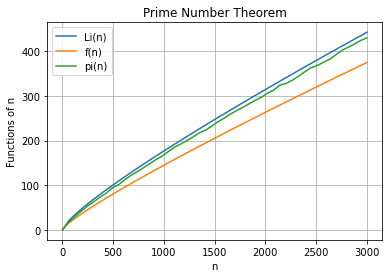

In [25]:
def f(n):
    return n/np.log(n)
# define functino pi(n) to graph
def pi(n):
    return sum(i<n for i in primes)
# n = 1 causes division by 0 so start from 2
# plot n from 2 to 3000 for the required functions
n = np.linspace(2,3001)
x = Li(n)
y = f(n)
z = pi(n)
plots = plt.plot(n,x,n,y,n,z)
plt.xlabel('n')
plt.ylabel('Functions of n')
plt.title('Prime Number Theorem')
plt.grid(True)
plt.legend(plots[:3], ['Li(n)', 'f(n)', 'pi(n)'])
plt.show

len(primes)

A graph of $n$ against
 - $\frac{\Pi(n)}{Li(n)}$;
 - $\frac{\Pi(n)\log n}{n}$;
 - a constant function with value $1$.
 
The graph will go up to $n=3,000$.

<ipython-input-27-f90ae091298c>:4: RuntimeWarning: invalid value encountered in true_divide
  plots = plt.plot(n,z/x,n,z*(1/y),[0,3000],[1,1])


<function matplotlib.pyplot.show(close=None, block=None)>

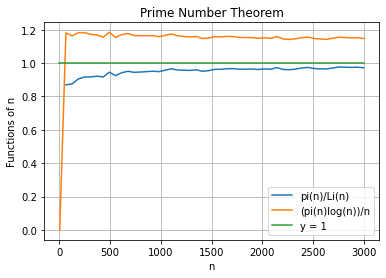

In [27]:
# When n = 2, Li(n) = 0 which causes division by zero
# therefore, plot from 3 to 3000
n = np.linspace(3,3001)
plots = plt.plot(n,z/x,n,z*(1/y),[0,3000],[1,1])
plt.xlabel('n')
plt.ylabel('Functions of n')
plt.title('Prime Number Theorem')
plt.grid(True)
plt.legend(plots[:3], ['pi(n)/Li(n)', '(pi(n)log(n))/n', 'y = 1'])
plt.show

The graph shows that $pi(n)/li(n)$ converges faster to $1$ and also provides a more accurate estimate for the number of primes up $n$ than $(pi(n)log(n))/n$.